In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
csv_dir="/mydata/rbachkaniwala3/code/rajveerb-ml-pipeline-benchmark/code/image_classification/analysis/low_level_func/logs"
program_file_dir="/mydata/rbachkaniwala3/code/rajveerb-ml-pipeline-benchmark/code/image_classification/analysis/low_level_func"

In [18]:
# get all program files that end with .py
program_files = [f for f in os.listdir(program_file_dir) if f.endswith(".py")]

In [19]:
program = program_files[0].split(".")[0]
same_program_csv_dir=os.path.join(csv_dir,program)
# samples = total number of runs for each program
samples = len(os.listdir(same_program_csv_dir))

In [20]:
op_to_func = {}

# loop through csv files in csv_dir
for program_ in program_files:
    program = program_.split(".")[0]
    same_program_csv_dir=os.path.join(csv_dir,program)
    common_funcs_per_op = set()
    for csv_file in os.listdir(same_program_csv_dir):
        df = pd.read_csv(os.path.join(same_program_csv_dir,csv_file))
        # merge two columns with "|" as separator
        df["full_func"] = df['Function'].astype(str) + "|" + df['Module'].astype(str)
        column_values = set(df["full_func"].values)        
        # Update the set of common values
        if len(common_funcs_per_op) == 0:
            common_funcs_per_op = column_values
        else:
            common_funcs_per_op = common_funcs_per_op.intersection(column_values)
    op_to_func[program] = list(common_funcs_per_op)
    print(f"Common functions for {program} are {common_funcs_per_op}")

Common functions for RandomHorizontalFlip are {'ImagingFlipLeftRight|_imaging.cpython-310-x86_64-linux-gnu.so'}
Common functions for convertRGB are {'__memmove_avx_unaligned_erms|libc.so.6', '__memset_avx2_unaligned_erms|libc.so.6', '__libc_calloc|libc.so.6', 'jpeg_idct_islow|libjpeg.so.9', 'ycc_rgb_convert|libjpeg.so.9', 'decode_mcu|libjpeg.so.9', 'ImagingUnpackRGB|_imaging.cpython-310-x86_64-linux-gnu.so', 'decompress_onepass|libjpeg.so.9', 'jpeg_idct_16x16|libjpeg.so.9'}
Common functions for RandomResizedCrop are {'__memmove_avx_unaligned_erms|libc.so.6', 'ImagingResampleHorizontal_8bpc|_imaging.cpython-310-x86_64-linux-gnu.so', '_int_free|libc.so.6'}
Common functions for Collation are {'c10::function_ref<void (char**, long const*, long, long)>::callback_fn<at::native::AVX2::VectorizedLoop2d<at::native::AVX2::direct_copy_kernel(at::TensorIteratorBase&)::{lambda()#3}::operator()(void) const::{lambda()#7}::operator()(void) const::{lambda(float)#1}, at::native::AVX2::direct_copy_kernel

In [21]:
op_to_func

{'RandomHorizontalFlip': ['ImagingFlipLeftRight|_imaging.cpython-310-x86_64-linux-gnu.so'],
 'convertRGB': ['__memmove_avx_unaligned_erms|libc.so.6',
  '__memset_avx2_unaligned_erms|libc.so.6',
  '__libc_calloc|libc.so.6',
  'jpeg_idct_islow|libjpeg.so.9',
  'ycc_rgb_convert|libjpeg.so.9',
  'decode_mcu|libjpeg.so.9',
  'ImagingUnpackRGB|_imaging.cpython-310-x86_64-linux-gnu.so',
  'decompress_onepass|libjpeg.so.9',
  'jpeg_idct_16x16|libjpeg.so.9'],
 'RandomResizedCrop': ['__memmove_avx_unaligned_erms|libc.so.6',
  'ImagingResampleHorizontal_8bpc|_imaging.cpython-310-x86_64-linux-gnu.so',
  '_int_free|libc.so.6'],
 'Collation': ['c10::function_ref<void (char**, long const*, long, long)>::callback_fn<at::native::AVX2::VectorizedLoop2d<at::native::AVX2::direct_copy_kernel(at::TensorIteratorBase&)::{lambda()#3}::operator()(void) const::{lambda()#7}::operator()(void) const::{lambda(float)#1}, at::native::AVX2::direct_copy_kernel(at::TensorIteratorBase&)::{lambda()#3}::operator()(void) con

In [22]:
op_func_cpu_time = {}
for op,funcs in op_to_func.items():
    for func in funcs:
        op_func_cpu_time[f"{op}|{func}"] = []
# loop through csv files in csv_dir
for program_ in program_files:
    program = program_.split(".")[0]
    same_program_csv_dir=os.path.join(csv_dir,program)
    for csv_file in os.listdir(same_program_csv_dir):
        df = pd.read_csv(os.path.join(same_program_csv_dir,csv_file))
        # merge two columns with "|" as separator
        df["full_func"] = df['Function'].astype(str) + "|" + df['Module'].astype(str)
        # multiply by 1000 to convert to ms
        df["CPU Time"] = df["CPU Time"] * 1000
        for func in op_to_func[program]:
            op_func_cpu_time[f"{program}|{func}"].append(df[df["full_func"] == func]["CPU Time"].astype(float).sum())
           

In [23]:
op_func_cpu_time

{'RandomHorizontalFlip|ImagingFlipLeftRight|_imaging.cpython-310-x86_64-linux-gnu.so': [639.073,
  691.476,
  1075.428,
  705.04,
  589.9799999999999,
  843.423,
  989.12,
  587.558,
  538.057,
  970.124,
  1070.06,
  537.99,
  528.783,
  921.2099999999999,
  584.677,
  939.981,
  984.902,
  989.987,
  634.104,
  532.366],
 'convertRGB|__memmove_avx_unaligned_erms|libc.so.6': [1517.999,
  1507.998,
  1579.9959999999999,
  1509.995,
  1519.995,
  1597.998,
  1519.9940000000001,
  1528.0,
  1539.9940000000001,
  1517.999,
  1509.995,
  1607.9950000000001,
  1609.996,
  1599.9969999999998,
  1507.993,
  1527.997,
  1535.9959999999999,
  1539.995,
  1539.995,
  1599.987],
 'convertRGB|__memset_avx2_unaligned_erms|libc.so.6': [31.981999999999996,
  20.0,
  28.001,
  24.002,
  56.006,
  32.001000000000005,
  24.014,
  20.0,
  27.994,
  36.003,
  92.004,
  8.001,
  12.001,
  35.994,
  11.998999999999999,
  16.015,
  12.0,
  20.0,
  24.0,
  44.003],
 'convertRGB|__libc_calloc|libc.so.6': [12.5

In [24]:
op_func_cpu_time_std_dev = {}
for op_func in op_func_cpu_time:
    # get std dev
    op_func_cpu_time_std_dev[op_func] = pd.Series(op_func_cpu_time[op_func]).std()
    print(f"Std dev for {op_func} is {op_func_cpu_time_std_dev[op_func]}")
    # print(f"CPU time for {op_func} is {sum(op_func_cpu_time[op_func])}")

Std dev for RandomHorizontalFlip|ImagingFlipLeftRight|_imaging.cpython-310-x86_64-linux-gnu.so is 204.079030110364
Std dev for convertRGB|__memmove_avx_unaligned_erms|libc.so.6 is 37.61797452940201
Std dev for convertRGB|__memset_avx2_unaligned_erms|libc.so.6 is 18.967286069496218
Std dev for convertRGB|__libc_calloc|libc.so.6 is 3.0412579612459876
Std dev for convertRGB|jpeg_idct_islow|libjpeg.so.9 is 81.88168150015059
Std dev for convertRGB|ycc_rgb_convert|libjpeg.so.9 is 133.82812393003042
Std dev for convertRGB|decode_mcu|libjpeg.so.9 is 42.54436171051651
Std dev for convertRGB|ImagingUnpackRGB|_imaging.cpython-310-x86_64-linux-gnu.so is 110.33266222803793
Std dev for convertRGB|decompress_onepass|libjpeg.so.9 is 28.474403922923294
Std dev for convertRGB|jpeg_idct_16x16|libjpeg.so.9 is 173.1799690351052
Std dev for RandomResizedCrop|__memmove_avx_unaligned_erms|libc.so.6 is 37.038495988704284
Std dev for RandomResizedCrop|ImagingResampleHorizontal_8bpc|_imaging.cpython-310-x86_64-l

In [25]:
# append to dataframe with columns as op, func and rows as std dev

def map_func(op_func):
    op,func,module = op_func.split("|")
    if "div_true_kernel" in func:
        func = "div_true_kernel"
    elif "direct_copy_kernel" in func:
        func = "direct_copy_kernel"
    elif "copy_kernel" in func:
        func = "copy_kernel"
    elif "add_kernel" in func:
        func = "add_kernel"

    std_dev = op_func_cpu_time_std_dev[op_func]
    avg = sum(op_func_cpu_time[op_func])/len(op_func_cpu_time[op_func])
    coefficent_of_variation = op_func_cpu_time_std_dev[op_func]/avg
    full_func = func + "|" + module
    return (op,func,coefficent_of_variation,module,std_dev,avg,full_func)

df = pd.DataFrame(list(map(map_func,op_func_cpu_time)),columns=["op","func","coefficient of variation","module","std_dev","avg","full_func"])


In [26]:
df

,op,func,coefficient of variation,module,std_dev,avg,full_func
0,RandomHorizontalFlip,ImagingFlipLeftRight,0.265843,_imaging.cpython-310-x86_64-linux-gnu.so,204.079030,767.66695,ImagingFlipLeftRight|_imaging.cpython-310-x86_...
1,convertRGB,__memmove_avx_unaligned_erms,0.024333,libc.so.6,37.617975,1545.99570,__memmove_avx_unaligned_erms|libc.so.6
2,convertRGB,__memset_avx2_unaligned_erms,0.658563,libc.so.6,18.967286,28.80100,__memset_avx2_unaligned_erms|libc.so.6
3,convertRGB,__libc_calloc,0.227049,libc.so.6,3.041258,13.39475,__libc_calloc|libc.so.6
4,convertRGB,jpeg_idct_islow,0.134202,libjpeg.so.9,81.881682,610.13685,jpeg_idct_islow|libjpeg.so.9
5,convertRGB,ycc_rgb_convert,0.105837,libjpeg.so.9,133.828124,1264.47500,ycc_rgb_convert|libjpeg.so.9
6,convertRGB,decode_mcu,0.361233,libjpeg.so.9,42.544362,117.77525,decode_mcu|libjpeg.so.9
7,convertRGB,ImagingUnpackRGB,0.073835,_imaging.cpython-310-x86_64-linux-gnu.so,110.332662,1494.30530,ImagingUnpackRGB|_imaging.cpython-310-x86_64-l...
8,convertRGB,decompress_onepass,0.356810,libjpeg.so.9,28.474404,79.80265,decompress_onepass|libjpeg.so.9
9,convertRGB,jpeg_idct_16x16,0.076670,libjpeg.so.9,173.179969,2258.76150,jpeg_idct_16x16|libjpeg.so.9


In [27]:
# get all columns in full_func and create a row for each op that does not have that column with full_func, but zero as the value in coefficient of variation, std_dev and avg and avg

all_full_funcs = set(df["full_func"].values)
all_ops = set(df["op"].values)

for op in all_ops:
    for full_func in all_full_funcs:
        if full_func not in set(df[df["op"] == op]["full_func"].values):
            func,module = full_func.split('|')
            df_ = pd.DataFrame([[op,func,0,module,0,0,full_func]],columns=["op","func","coefficient of variation","module","std_dev","avg","full_func"])
            df = pd.concat([df,df_],ignore_index=True)

In [28]:
# sort by op and then by full_func
df = df.sort_values(by=["op","full_func"])

/tmp/ipykernel_565342/2192056992.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar = sns.barplot(x="func",y="avg", hue="op", data=df, ci=None,color="#DB4437", edgecolor="black")
/tmp/ipykernel_565342/2192056992.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#DB4437'` for the same effect.

  bar = sns.barplot(x="func",y="avg", hue="op", data=df, ci=None,color="#DB4437", edgecolor="black")


ValueError: 'yerr' (shape: (132,)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'y' (shape: (138,))

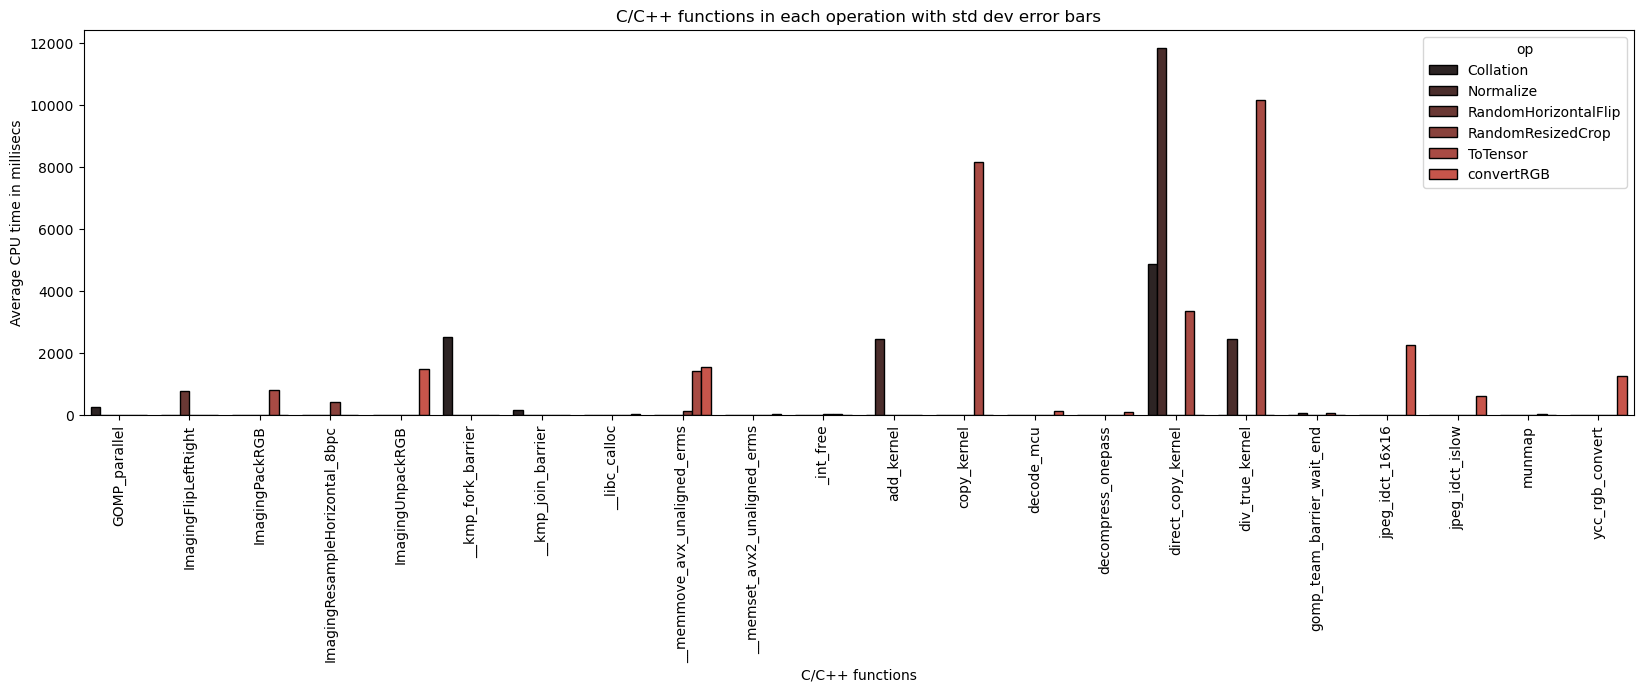

In [29]:

plt.figure(figsize=(20,5))
bar = sns.barplot(x="func",y="avg", hue="op", data=df, ci=None,color="#DB4437", edgecolor="black")
# plt.errorbar(x="func", y=df["avg"], yerr=df["std_dev"], fmt='none', color='black', capsize=4)

plt.xlabel("C/C++ functions")
plt.ylabel("Average CPU time in millisecs")
plt.title("C/C++ functions in each operation with std dev error bars")
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)

# Define some hatches
# hatches = ['O','-', 'x', '\\', '//',]
hatches = ['//', '\\\\', '--', 'xx', 'oo', 'OO', '..', '**']
# Assign hatches to each hue category
# for i, patch in enumerate(bar.containers):
#     for bar in patch:
#         bar = bar.set_hatch(hatches[i % len(hatches)])
# get axes subplot object from plt
# bar = plt.gca()
for p in bar.patches:
    width = p.get_width() 
    break
x_coords = [p.get_x() + 0.5 * p.get_width() for p in bar.patches]
y_coords = [p.get_height() for p in bar.patches]
plt.errorbar(x=x_coords, y=y_coords, yerr=df["std_dev"], fmt="none", c="k",capsize=3)

legend = plt.legend(loc='upper left', ncol=len(hatches)//4,  borderaxespad=0., fontsize='x-large', title_fontsize='40')

sns.set_style("darkgrid")

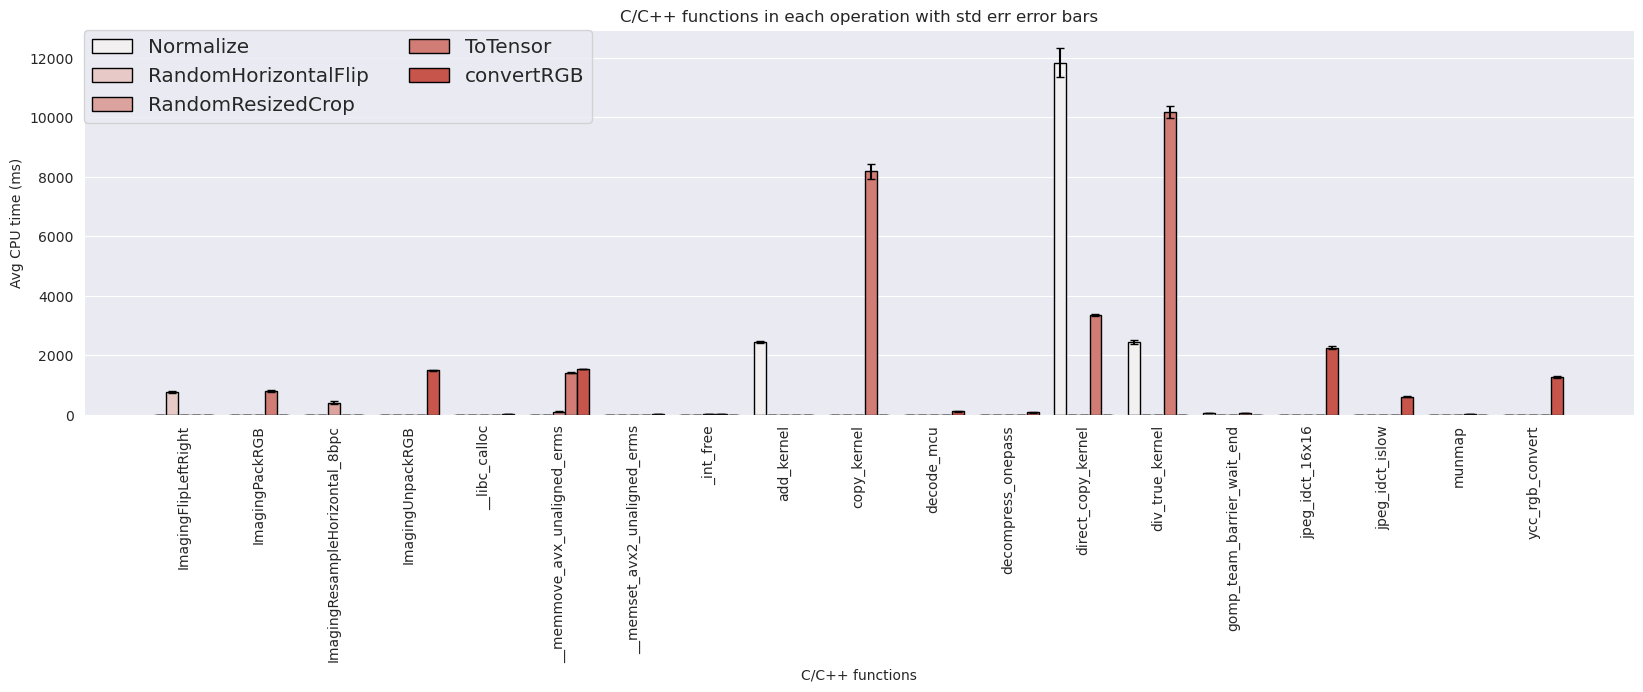

In [ ]:

df['std_err'] = df['std_dev'] / np.sqrt(samples)  # where n=20

plt.figure(figsize=(20,5))
bar = sns.barplot(x="func",y="avg", hue="op", data=df, ci=None,color="#DB4437", edgecolor="black")
# plt.errorbar(x="func", y=df["avg"], yerr=df["std_dev"], fmt='none', color='black', capsize=4)

plt.xlabel("C/C++ functions")
plt.ylabel("Avg CPU time (ms)")
plt.title("C/C++ functions in each operation with std err error bars")
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)

# Define some hatches
# hatches = ['O','-', 'x', '\\', '//',]
hatches = ['//', '\\\\', '--', 'xx', 'oo', 'OO', '..', '**']
# Assign hatches to each hue category
# for i, patch in enumerate(bar.containers):
#     for bar in patch:
#         bar = bar.set_hatch(hatches[i % len(hatches)])
# get axes subplot object from plt
# bar = plt.gca()
for p in bar.patches:
    width = p.get_width() 
    break
x_coords = [p.get_x() + 0.5 * p.get_width() for p in bar.patches]
y_coords = [p.get_height() for p in bar.patches]
plt.errorbar(x=x_coords, y=y_coords, yerr=df["std_err"], fmt="none", c="k",capsize=3)

legend = plt.legend(loc='upper left', ncol=len(hatches)//4,  borderaxespad=0., fontsize='x-large', title_fontsize='40')

sns.set_style("darkgrid")



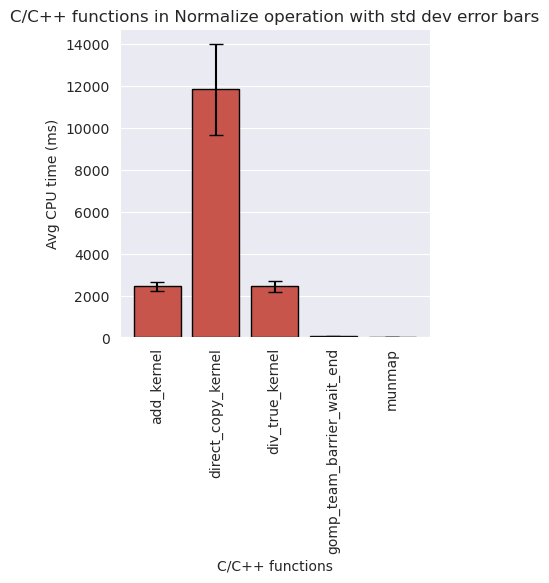

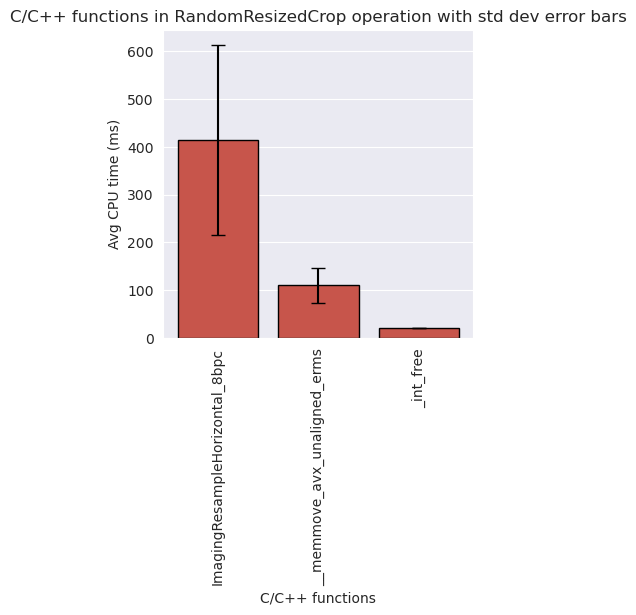

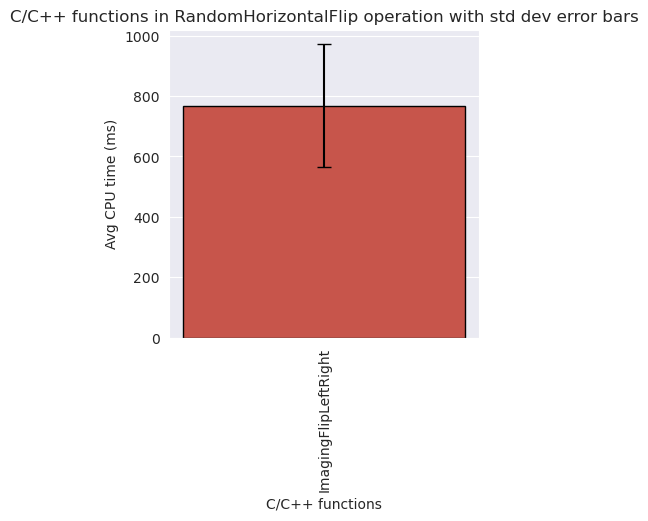

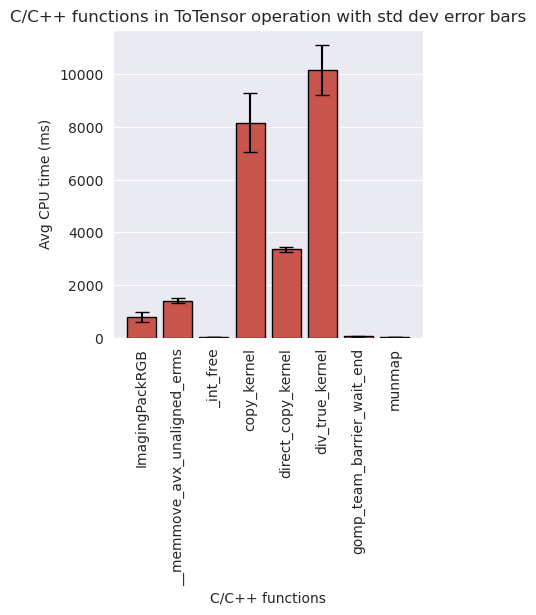

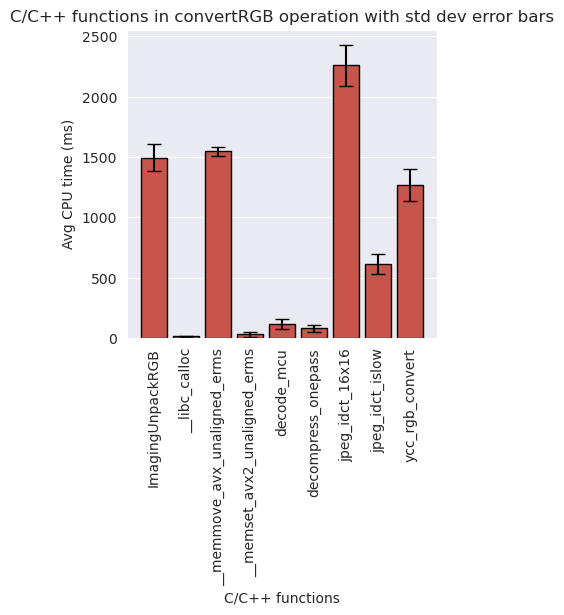

In [ ]:

for op in all_ops:
    df_ = df[df["op"] == op]
    # and avg is not zero
    df_ = df_[df_["avg"] != 0]
    plt.figure(figsize=(4,4))
    bar = sns.barplot(x="func",y="avg", data=df_, ci=None,color="#DB4437", edgecolor="black")

    plt.xlabel("C/C++ functions")
    plt.ylabel("Avg CPU time (ms)")
    plt.title(f"C/C++ functions in {op} operation with std dev error bars")
    # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation=90)

    x_coords = [p.get_x() + 0.5 * p.get_width() for p in bar.patches]
    y_coords = [p.get_height() for p in bar.patches]
    plt.errorbar(x=x_coords, y=y_coords, yerr=df_["std_dev"], fmt="none", c="k",capsize=5,)

    sns.set_style("darkgrid")
    plt.show()



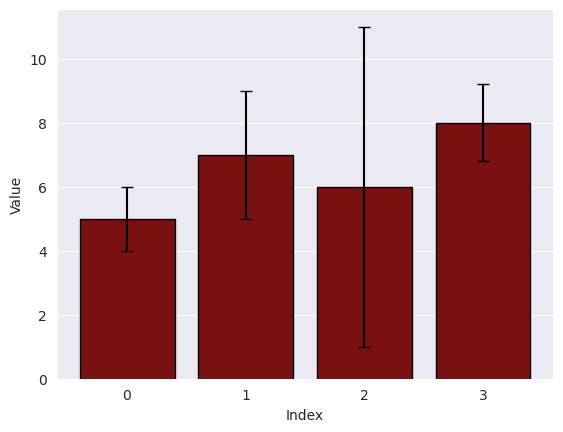

In [ ]:
# Create a sample dataframe
data = {'avg': [5, 7, 6, 8],
        'std_dev': [1, 2, 5, 1.2],
        '1std_dev': [1, 2, 5, 1.2]}
df = pd.DataFrame(data)

# Create the bar plot for 'avg' column
bar = sns.barplot(x=df.index, y='avg', data=df, color='darkred', edgecolor='black')

# Add error bars for 'std_dev' column
plt.errorbar(x=df.index, y=df['avg'], yerr=df['std_dev'], fmt='none', color='black', capsize=4)

plt.xlabel('Index')
plt.ylabel('Value')
plt.xticks(ticks=df.index, labels=df.index)
sns.set_style('darkgrid')

# Show the plot
plt.show()

In [ ]:
# plot a dataframe's std dev for each op
for op in df["op"].unique():
    plt.figure(figsize=(5,5))
    sns.barplot(x="func", y="coefficient of variation", data=df[df["op"] == op],color="#4285F4",ci=None)
    # add more subplots
    # sns.barplot(x="func", y="std_dev", data=df[df["op"] == op],color="red",ci=None)
    plt.xticks(rotation=90)
    plt.title(f"coefficient of variation for {op}")
    # change x axis title
    plt.xlabel("C/C++ functions")
plt.show()

KeyError: 'op'